<a href="https://colab.research.google.com/github/Korchomnyi-Ivan/Chiselni-Metodu/blob/main/%D0%9B_%D0%A0_2%2C_%D0%9A%D0%BE%D1%80%D1%87%D0%BE%D0%BC%D0%BD%D0%BE%D0%B3%D0%BE_%D0%86%D0%B2%D0%B0%D0%BD%D0%B0_%D0%9C%D0%B8%D0%BA%D0%BE%D0%BB%D0%B0%D0%B9%D0%BE%D0%B2%D0%B8%D1%87%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 2, Корчомного Івана Миколайовича, Група ФІТ 2-15, Варіант 4.
Тема: «Чисельні методи розв’язання нелінійних рівнянь»


1. Метод ділення навпіл.

In [1]:
import numpy as np
import pandas as pd

# Визначаємо функцію
def f (x):
    y = np.cos(x)*np.sin(x)*(x**2+x+1)
    return y
# Визначаємо границі відрізку
a = -3
b = -1
# Визначаємо точність розв'язку
h = 0.001
# Поділяємо відрізок навпіл
c = (a+b)/2
# Зберігаємо результати обчислень
data_A = [a]
data_B = [b]
data_C = [c]
data_F_A = [f(a)]
data_F_B = [f(b)]
data_F_C = [f(c)]
# Перевіряємо досягнення точності
while abs(f(c)) > h:
    # Звужуємо відрізок
    if np.sign(f(c)) == np.sign(f(a)):
        a = c
    else:
        b = c
    # Поділяємо відрізок навпіл
    c = (a+b)/2
    # Зберігаємо результати обчислень
    data_A.append(a)
    data_B.append(b)
    data_C.append(c)
    data_F_A.append(f(a))
    data_F_B.append(f(b))
    data_F_C.append(f(c))
# Відображаємо результати обчислень
print('Результати обчислень')
print()
data = pd.DataFrame({'a': data_A,
                     'F(a)': data_F_A,
                     'c': data_C,
                     'F(c)': data_F_C,
                     'b': data_B,
                     'F(b)': data_F_B})
print(data)
# Відображаємо наближений корінь рівняння
print()
print('В точці с = ', c, ', f(c) = ', f(c))

Результати обчислень

          a      F(a)         c      F(c)       b      F(b)
0 -3.000000  0.977954 -2.000000  1.135204 -1.0000 -0.454649
1 -2.000000  1.135204 -1.500000 -0.123480 -1.0000 -0.454649
2 -2.000000  1.135204 -1.750000  0.405593 -1.5000 -0.123480
3 -1.750000  0.405593 -1.625000  0.109040 -1.5000 -0.123480
4 -1.625000  0.109040 -1.562500 -0.015587 -1.5000 -0.123480
5 -1.625000  0.109040 -1.593750  0.044659 -1.5625 -0.015587
6 -1.593750  0.044659 -1.578125  0.014015 -1.5625 -0.015587
7 -1.578125  0.014015 -1.570312 -0.000917 -1.5625 -0.015587

В точці с =  -1.5703125 , f(c) =  -0.0009171268569415665


2. Метод ділення навпіл

In [2]:
import numpy as np
import scipy.optimize as sp

def f(x):
    y = np.cos(x)*np.sin(x)*(x**2+x+1)
    return y

a = -3
b = -1
tol = 1.e-3

x = sp.bisect(f, a,b,(),tol) #функція для метода

print('The approximate solution x is:', x)
print('And the value f(x) is:', f(x))

The approximate solution x is: -1.5712890625
And the value f(x) is: 0.0009350448126615916


3. Метод хорд

In [3]:
import numpy as np
import pandas as pd
# Визначаємо функцію
def f(x):
    y = np.cos(x)*np.sin(x)*(x**2+x+1)
    return y
# Визначаємо межі відрізку
a = -3
b = -1
# Визначаємо точність розв'язку
h = 0.001
# Точка, де хорда перетинає вісь 0x
c = (f(a)*b-a*f(b))/(f(a)-f(b))

# Зберігаємо результати обчислень
data_A = [a]
data_B = [b]
data_C = [c]
data_F_A = [f(a)]
data_F_B = [f(b)]
data_F_C = [f(c)]
# Перевіряємо досягнення точності
while abs(f(c)) > h:
    # Звужуємо відрізок
    if np.sign(f(c)) == np.sign(f(a)):
        a = c
    else:
        b = c
    # Точка, де хорда перетинає вісь 0x
    c = (f(a)*b-a*f(b))/(f(a)-f(b))
    # Зберігаємо результати обчислень
    data_A.append(a)
    data_B.append(b)
    data_C.append(c)
    data_F_A.append(f(a))
    data_F_B.append(f(b))
    data_F_C.append(f(c))
# Відображаємо результати обчислень
print('Результати обчислень')
print()
data = pd.DataFrame({'a': data_A, 'F(a)': data_F_A,
                     'c': data_C, 'F(c)': data_F_C,
                     'b': data_B, 'F(b)': data_F_B})
print(data)
# Відображаємо наближений корінь рівняння
print()
print('В точці с = ', c, ', f(c) = ', f(c))

Результати обчислень

          a      F(a)         c      F(c)         b      F(b)
0 -3.000000  0.977954 -1.634717  0.129889 -1.000000 -0.454649
1 -1.634717  0.129889 -1.493678 -0.133455 -1.000000 -0.454649
2 -1.634717  0.129889 -1.565152 -0.010636 -1.493678 -0.133455
3 -1.634717  0.129889 -1.570418 -0.000718 -1.565152 -0.010636

В точці с =  -1.5704175737258015 , f(c) =  -0.0007180376446871882


 # Знаходження коренів рівняння за допомогою бібліотеки SymPy

In [6]:
import sympy as sym

x = sym.Symbol('x')

y = sym.cos(x)*sym.sin(x)*(x**2+x+1)

s = sym.solve(y)

print(s)

[0, pi/2, pi, 3*pi/2, -1/2 - sqrt(3)*I/2, -1/2 + sqrt(3)*I/2]


In [7]:
import sympy as sym

x, a, b, c = sym.symbols('x, a, b, c')

y = a * x**2 + b * x + c

s = sym.solve(y, x)

print(s)

[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]


In [8]:
!pip install numdifftools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 4.2 MB/s eta 0:00:00


In [13]:
#Лабораторна робота 2
#Відокремлення коренів
import numpy as np
import numdifftools as nd
def f(x):
    return x**4 + 4*x**3 - 17


def find_segments(): #відокремлюємо корені
    search_range = np.arange(-10, 4, 1)

    a = None
    previous_x = None
    current_x  = None
    segments = []

    for x in search_range:
        x = round(x, 4)
        current_x = f(x)
        if previous_x != None and previous_x * current_x < 0:
            segments.append((a, x))
        a = x
        previous_x = current_x
    return segments

segments = find_segments()
for a, b in segments:
    print(f'Found segment:  [{a}, {b}]')


Found segment:  [-5, -4]
Found segment:  [1, 2]


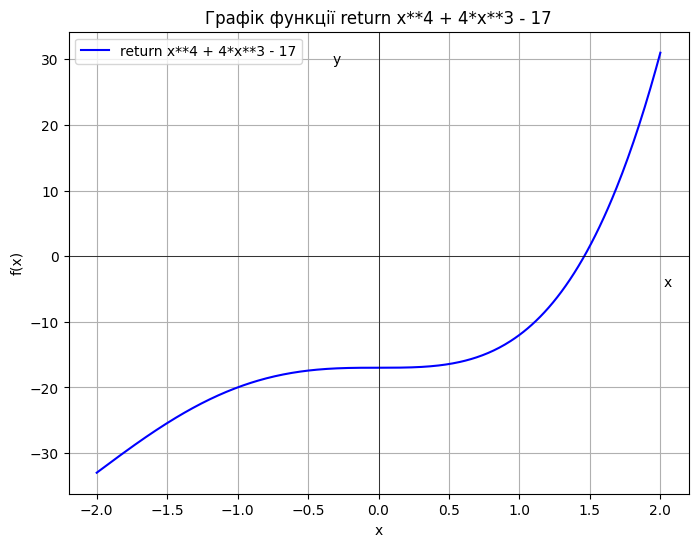

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Визначення функції
def f(x):
    return x**4 + 4*x**3 - 17

# Генерація значень x
x = np.linspace(-2, 2, 400)

# Генерація значень y
y = f(x)

# Побудова графіка
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='return x**4 + 4*x**3 - 17', color='blue')
plt.title('Графік функції return x**4 + 4*x**3 - 17')
plt.xlabel('x')
plt.ylabel('f(x)')

# Додавання осей з стрілками
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.text(2.05, -4, 'x', ha='center', va='center')
plt.text(-0.3, 30, 'y', ha='center', va='center')

plt.grid(True)
plt.legend()
plt.show()


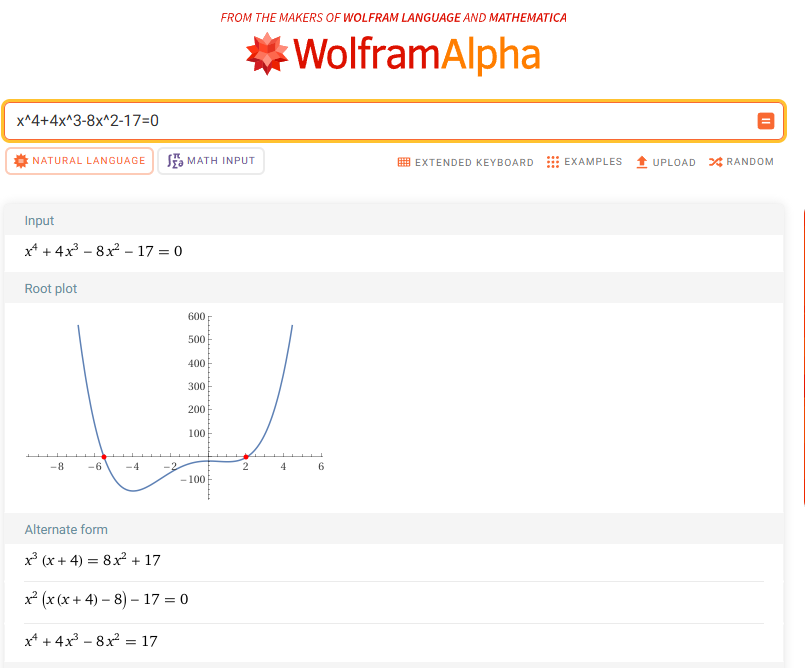

In [22]:
#Лабораторна робота. Метод половинного ділення, хорд


def rec(a, b, eps):  # метод половинного ділення
    while (abs(a - b) > eps):
        if f(a) * f((a + b) / 2) < 0:
            b = (a + b) / 2
        else:
            a = (a + b) / 2
        x = (a + b) / 2

    print('x= ', round(x, 5), '  -   Half division method')

def hord(a, b, eps):  # метод хорд
    derivative_f = nd.Derivative(f, n=1)
    if f(a) * derivative_f(a) > 0:
        x0 = a
        xi = b
    else:
        x0 = b
        xi = a
    xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    while (abs(xi_1 - xi) > eps):
        xi = xi_1
        xi_1 = xi - (xi - x0) * f(xi) / (f(xi) - f(x0))
    print('x= ', round(xi_1, 5), '  -   Chord method')

if __name__ == "__main__":
    a1, b1 = -5, -4
    a2, b2 = 1, 2
    eps = 0.001
    print("Розв'язки на відрізку [-5,-4]")
    rec(a1, b1, eps)
    hord(a1, b1, eps)
    print("\n Розв'язки на відрізку [1,2]")
    rec(a2, b2, eps)
    hord(a2, b2, eps)


Розв'язки на відрізку [-5,-4]
x=  -4.2251   -   Half division method
x=  -4.22529   -   Chord method

 Розв'язки на відрізку [1,2]
x=  1.46045   -   Half division method
x=  1.45991   -   Chord method


Висновок: Виконуючи дану лабораторну роботу, я вдосконалив свої навички програмування у сфері коренів нелінійного рівняння та хорд.